In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#!pip install xlrd

In [3]:
xls_file = "default_credit_score.xls"
df = pd.read_excel(xls_file)

# Set the second row as header
df.columns = df.iloc[0]  # Assign the second row as header
df = df[1:].reset_index(drop=True)  # Remove the first row and reset index

# Save as CSV
csv_file = "default_credit_score.csv"
df.to_csv(csv_file, index=False)

print(f"File saved as {csv_file} with corrected headers.")

File saved as default_credit_score.csv with corrected headers.


In [4]:
df = pd.read_csv("default_credit_score.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.columns = ['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 
               'PAY_ST9', 'PAY_ST8', 'PAY_ST7', 'PAY_ST6', 'PAY_ST5','PAY_ST4',
               'BILL_AMT9', 'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 
               'PAY_AMT9', 'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'DEFAULT_PAYMENT']

In [6]:
df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_ST9,PAY_ST8,PAY_ST7,PAY_ST6,...,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT9,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4,DEFAULT_PAYMENT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_ST9',
       'PAY_ST8', 'PAY_ST7', 'PAY_ST6', 'PAY_ST5', 'PAY_ST4', 'BILL_AMT9',
       'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4',
       'PAY_AMT9', 'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'DEFAULT_PAYMENT'],
      dtype='object')

### Exploration

In [8]:
df.describe()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_ST9,PAY_ST8,PAY_ST7,PAY_ST6,...,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT9,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4,DEFAULT_PAYMENT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
# dropping ID since it will mess the training, due to the numerical values
df.drop(columns=['ID'], inplace=True)

### Outliers

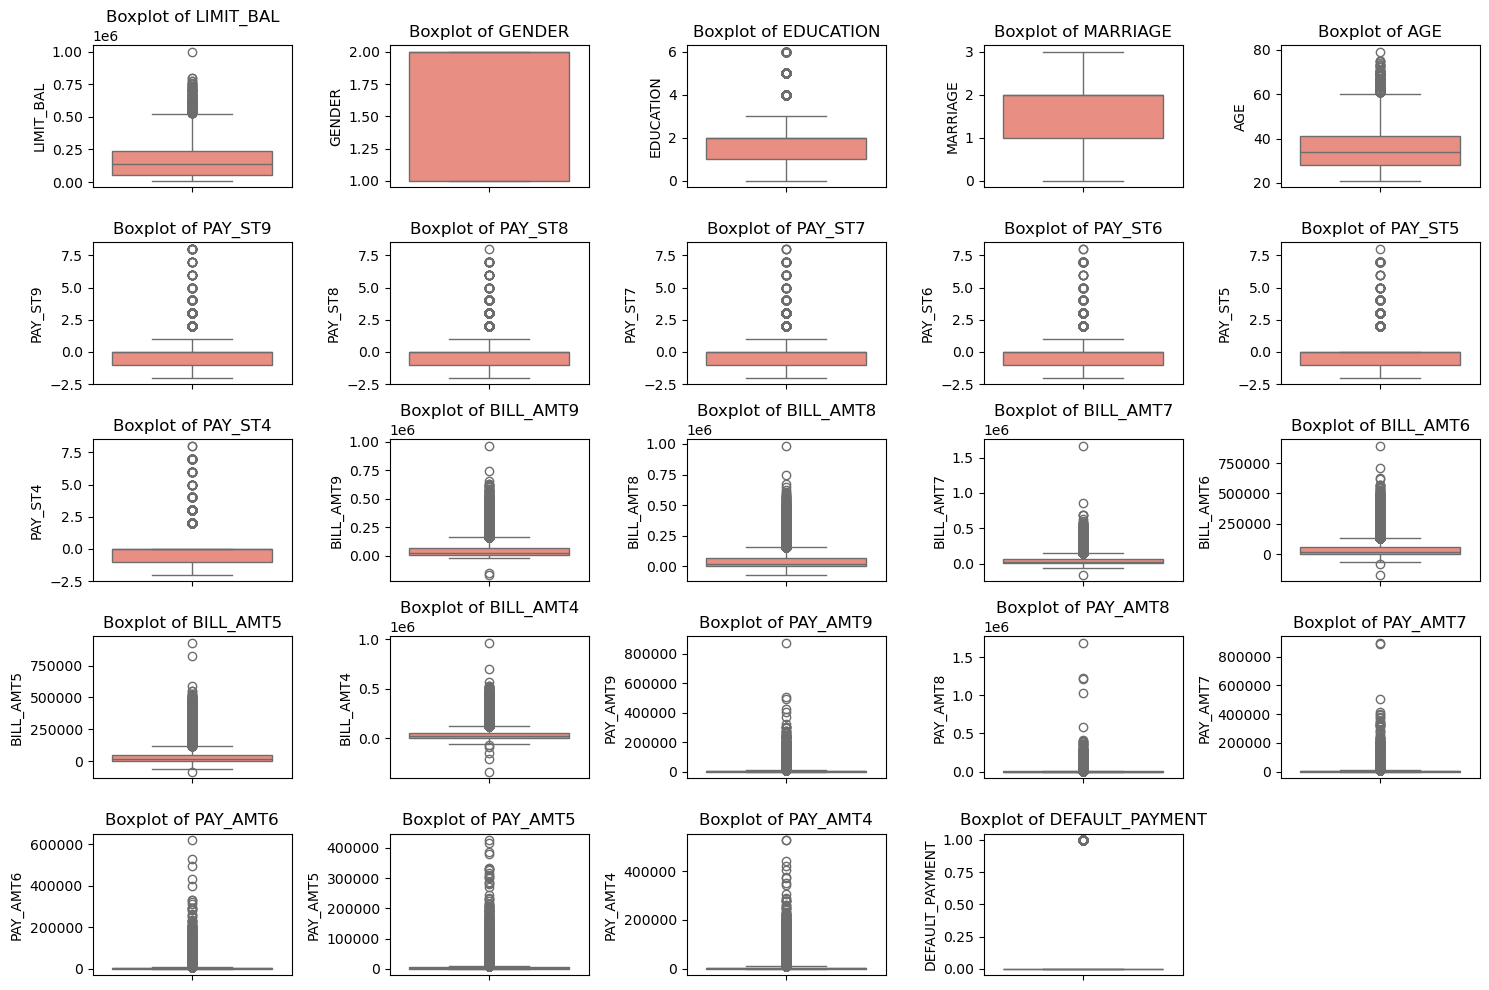

In [10]:
# Select only numerical columns
# numerical_cols = df.columns[df.columns != "DEFAULT_PAYMENT"]

# Set plot size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create boxplots
for i, col in enumerate(df.columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[col], color="salmon")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [11]:
# Define the cap limit (95th percentile)
def cap_outliers(df, cols, threshold=0.95):
    for col in cols:
        upper_limit = np.percentile(df[col], threshold * 100)
        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    return df

# Apply capping to the most affected features
cols_to_cap = ['BILL_AMT9', 'BILL_AMT8', 'BILL_AMT7','BILL_AMT6','BILL_AMT5','BILL_AMT4','PAY_AMT9',
               'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5','PAY_AMT4']
df = cap_outliers(df, cols_to_cap)

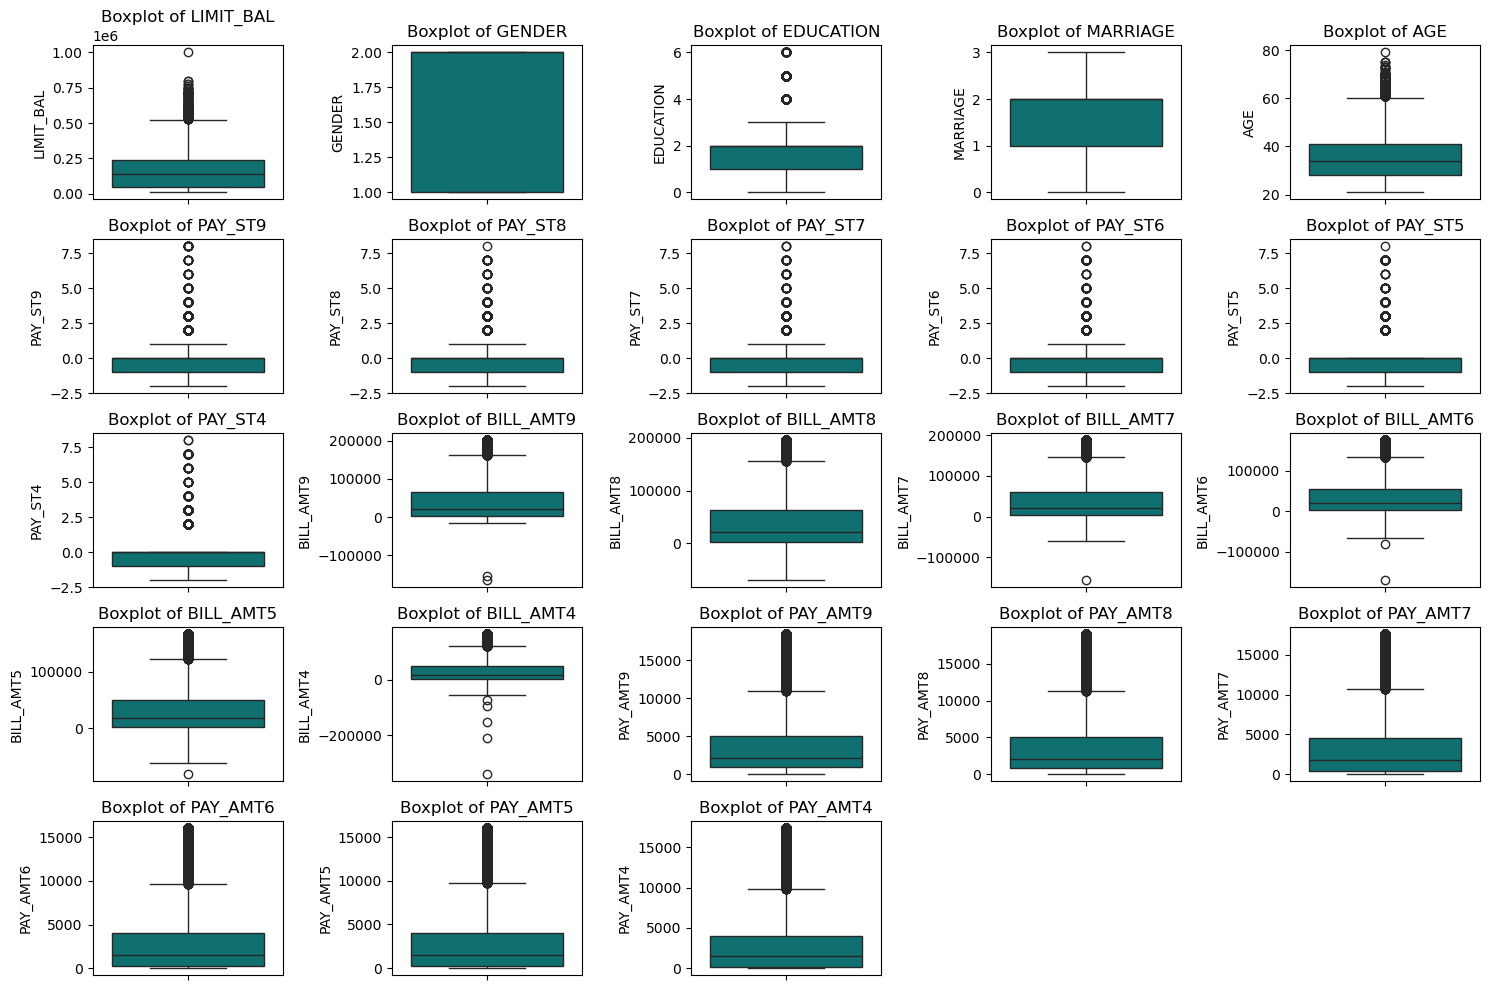

In [12]:
# Select only numerical columns
numerical_cols = df.columns[df.columns != "DEFAULT_PAYMENT"]

# Set plot size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[col], color='teal')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### Scaling for KNN 

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Define features and target
X = df.drop(columns=['DEFAULT_PAYMENT'])  # Drop the target column
y = df['DEFAULT_PAYMENT']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check the transformed data
X_scaled.describe()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_ST9,PAY_ST8,PAY_ST7,PAY_ST6,PAY_ST5,...,BILL_AMT7,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT9,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-6.063298e-17,2.330580e-16,6.252776e-17,-7.579123e-18,-1.856885e-16,-1.894781e-17,4.926430e-17,-5.494864e-17,3.126388e-17,-3.031649e-17,...,-2.273737e-17,-9.473903e-18,-7.010688e-17,-2.392161e-17,2.984279e-17,1.080025e-16,-1.098973e-16,-1.421085e-18,-3.848773e-18,-5.305386e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.213794e+00,-1.234323e+00,-2.344743e+00,-2.973147e+00,-1.571479e+00,-1.764843e+00,-1.558876e+00,-1.532192e+00,-1.521944e+00,-1.530046e+00,...,-3.748138e+00,-4.221544e+00,-2.506279e+00,-8.109482e+00,-8.372480e-01,-8.059911e-01,-7.651960e-01,-7.492453e-01,-7.508471e-01,-7.191974e-01
25%,-9.054983e-01,-1.234323e+00,-1.079457e+00,-1.057295e+00,-8.120745e-01,-8.749911e-01,-7.235699e-01,-6.966635e-01,-6.665987e-01,-6.475648e-01,...,-7.521613e-01,-7.460135e-01,-7.415299e-01,-7.370034e-01,-6.277730e-01,-6.354609e-01,-6.795909e-01,-6.788008e-01,-6.906270e-01,-6.927466e-01
50%,-2.118326e-01,8.101607e-01,1.858283e-01,8.585573e-01,-1.611565e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,2.349165e-01,...,-4.257899e-01,-4.086944e-01,-3.944818e-01,-3.949389e-01,-3.973506e-01,-3.947124e-01,-3.700955e-01,-3.922630e-01,-3.931037e-01,-3.822443e-01
75%,5.589071e-01,8.101607e-01,1.858283e-01,8.585573e-01,5.982479e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,2.349165e-01,...,3.249593e-01,3.063510e-01,2.869357e-01,2.999451e-01,2.113836e-01,2.175994e-01,2.236529e-01,2.058608e-01,2.106479e-01,1.793442e-01
max,6.416528e+00,8.101607e-01,5.246970e+00,2.774410e+00,4.720729e+00,7.133674e+00,6.794184e+00,6.823091e+00,7.031505e+00,7.294767e+00,...,2.716348e+00,2.723060e+00,2.742039e+00,2.737844e+00,3.022998e+00,3.084543e+00,3.095683e+00,3.062124e+00,3.065083e+00,3.176834e+00


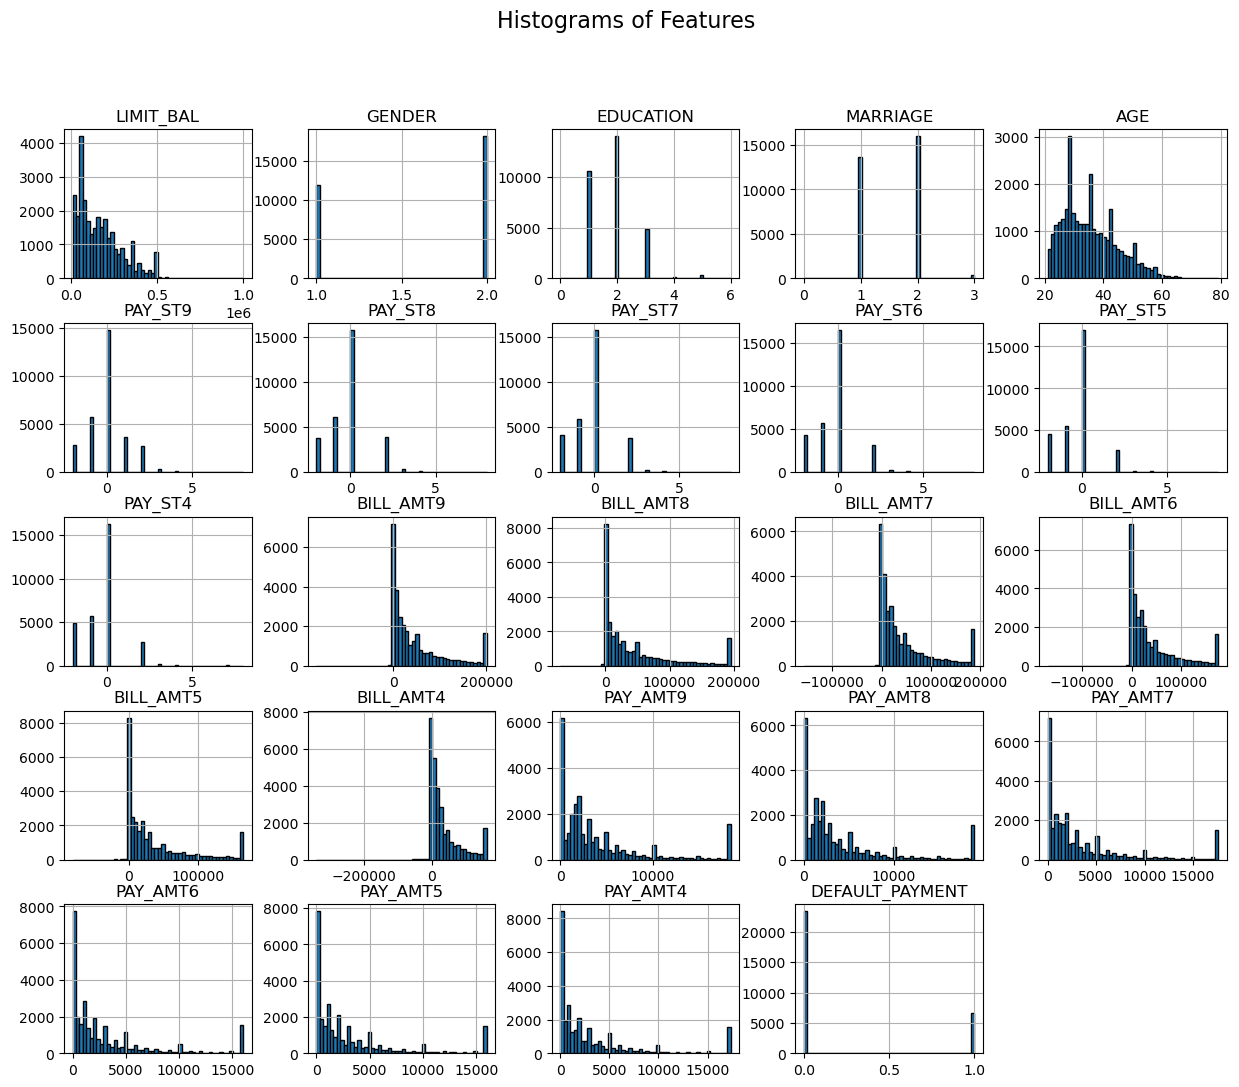

In [15]:
# Plot histograms for all numerical features
df.hist(figsize=(15, 12), bins=50, edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

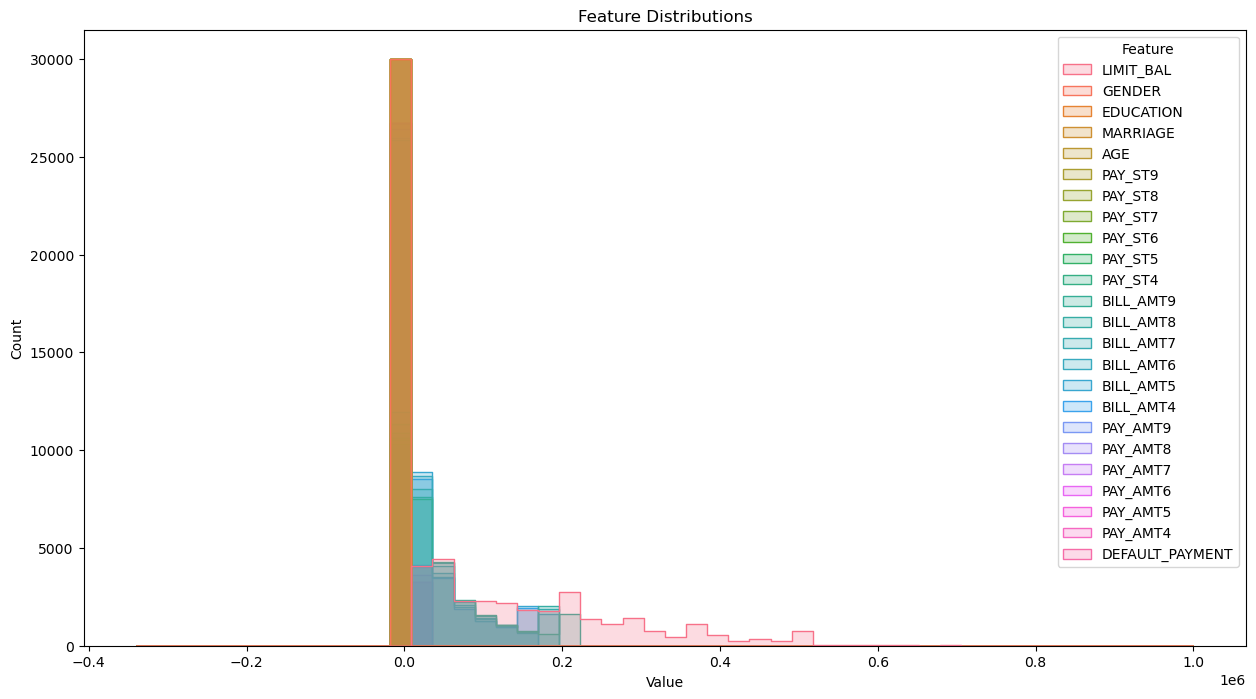

In [16]:
# Plot histograms with Seaborn
df_melted = df.melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(15, 8))
sns.histplot(data=df_melted, x="Value", hue="Feature", bins=50, element="step", common_norm=False)
plt.title('Feature Distributions')
plt.show()

### Splitting 80/20

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# setting train and test data (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Trainning Model - KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# testing different values of k to perform KNN
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on test set
    error = 1 - accuracy_score(y_test, y_pred)  # Calculate error rate
    error_rates.append(error)

# finding lowest k value
k_min_value = min(error_rates)
knn_n = error_rates.index(k_min_value)
knn_n # index + 1 is the optimal KNN value which is the lowest 

13

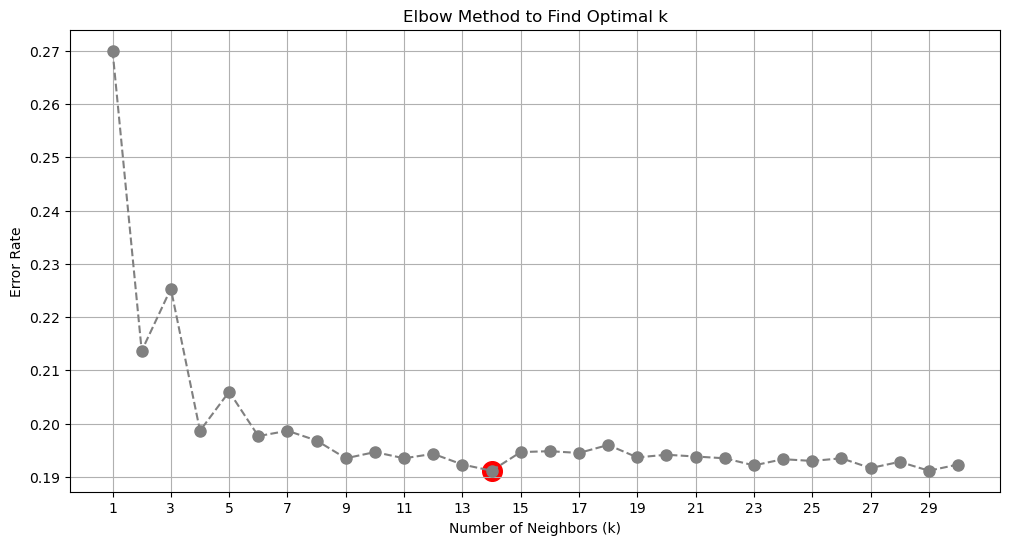

In [19]:
# plotting the elbow curve to find the optimal value of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='grey', markersize=8)

plt.scatter(k_values[knn_n], error_rates[knn_n], 
            color='red', s=200)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31, step=2))
plt.grid(True)
plt.show()

In [20]:
# calculating test accuracy when k=14
knn_14 = KNeighborsClassifier(n_neighbors=14)
knn_14.fit(X_train, y_train)
y_pred_14 = knn_14.predict(X_test)

In [21]:
# results
conf_matrix = confusion_matrix(y_test, y_pred_14)
class_report = classification_report(y_test, y_pred_14)
knn_accuracy = accuracy_score(y_test, y_pred_14)

# printing results 
print("Accuracy Score for KNN with 14 neighbors:", round(knn_accuracy, 2))

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

print(f"\nObservations:")
print(f"True Negatives(TN) = {conf_matrix[0,0]} values (default payment = 0 / no) were predicted correctly")
print(f"False Positives (FP) = {conf_matrix[0,1]} values (default payment = 0 / no) were predicted incorrectly")
print(f"False Negatives (FN) = {conf_matrix[1,0]} values (default payment = 1 / yes) were predicted incorrectly")
print(f"True Positives (TP) = {conf_matrix[1,1]} values (default payment = 1 / yes) were predicted correctly")

Accuracy Score for KNN with 14 neighbors: 0.81

Confusion Matrix:
 [[4457  216]
 [ 931  396]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.65      0.30      0.41      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000


Observations:
True Negatives(TN) = 4457 values (default payment = 0 / no) were predicted correctly
False Positives (FP) = 216 values (default payment = 0 / no) were predicted incorrectly
False Negatives (FN) = 931 values (default payment = 1 / yes) were predicted incorrectly
True Positives (TP) = 396 values (default payment = 1 / yes) were predicted correctly


In [22]:
train_accuracy = knn_14.score(X_train, y_train)  # Accuracy on training data 
test_accuracy = knn_14.score(X_test, y_test)    # Accuracy on test data 

print(f"Training Accuracy based on the KNN Model: {train_accuracy:.4f}")
print(f"Test Accuracy based on the KNN Model: {test_accuracy:.4f}")

Training Accuracy based on the KNN Model: 0.8233
Test Accuracy based on the KNN Model: 0.8088


### Improving the Model 

#### + Using feature importance from *Random Forest*

In [23]:
X_scaled.shape

(30000, 23)

In [24]:
from sklearn.ensemble import RandomForestClassifier

# training the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# sort features by importance
sorted_indices = np.argsort(importances)[::-1]
top_k = 18  # Number of features to display
top_features = [feature_names[i] for i in sorted_indices[:top_k]]
top_importances = [importances[i] for i in sorted_indices[:top_k]]

# get the percentage
top_importances = np.array(top_importances) * 100

In [25]:
top_features

['PAY_ST9',
 'AGE',
 'LIMIT_BAL',
 'BILL_AMT9',
 'BILL_AMT8',
 'PAY_AMT9',
 'BILL_AMT7',
 'PAY_AMT8',
 'BILL_AMT4',
 'BILL_AMT6',
 'BILL_AMT5',
 'PAY_AMT7',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'PAY_ST8',
 'PAY_ST7',
 'PAY_ST6']

In [26]:
# Calculate total importance
total_importance = np.sum(importances)

# Sum of the top k feature importances
top_k_importance_sum = np.sum(top_importances / 100)  # Convert back to original scale

# Calculate percentage covered by top 10 features
coverage_percentage = (top_k_importance_sum / total_importance) * 100

print(f"Top {top_k} features cover: {coverage_percentage:.2f}% of total importance")

Top 18 features cover: 91.22% of total importance


C:\Users\USER\AppData\Local\Temp\ipykernel_20024\4191029500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette="viridis", legend=True)


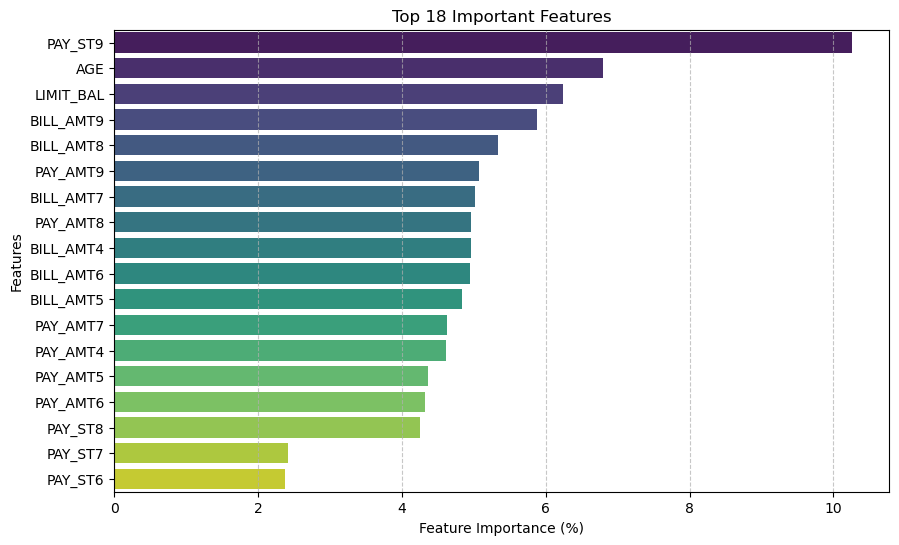

In [27]:
# plotting top 1' features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features, palette="viridis", legend=True)
plt.xlabel("Feature Importance (%)")
plt.ylabel("Features")
plt.title(f'Top {top_k} Important Features')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

### Training KNN Model after feature importance

In [28]:
X_fi = X_scaled[top_features]
X_fi

,PAY_ST9,AGE,LIMIT_BAL,BILL_AMT9,BILL_AMT8,PAY_AMT9,BILL_AMT7,PAY_AMT8,BILL_AMT4,BILL_AMT6,BILL_AMT5,PAY_AMT7,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_ST8,PAY_ST7,PAY_ST6
0,1.794564,-1.246020,-1.136720,-0.745707,-0.753041,-0.837248,-0.789201,-0.664940,-0.764170,-0.792940,-0.778971,-0.765196,-0.719197,-0.750847,-0.749245,1.782348,-0.696663,-0.666599
1,-0.874991,-1.029047,-0.365981,-0.767119,-0.777836,-0.837248,-0.751866,-0.601273,-0.693637,-0.726949,-0.705596,-0.545696,-0.269927,-0.750847,-0.511257,1.782348,0.138865,0.188746
2,0.014861,-0.161156,-0.597202,-0.305184,-0.556316,-0.519265,-0.548107,-0.498914,-0.427858,-0.503909,-0.461517,-0.545696,0.403980,-0.512352,-0.511257,0.111736,0.138865,0.188746
3,0.014861,0.164303,-0.905498,0.003578,0.059628,-0.418298,0.121261,-0.392665,-0.125094,-0.221896,-0.163962,-0.501796,-0.494562,-0.495895,-0.487458,0.111736,0.138865,0.188746
4,-0.874991,2.334029,-0.905498,-0.663885,-0.706799,-0.418298,-0.130810,3.084543,-0.350383,-0.370617,-0.372363,1.429807,-0.566670,-0.586524,1.392648,0.111736,-0.696663,0.188746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.014861,0.381275,0.404759,2.472809,2.663099,0.943289,2.716348,3.084543,-0.418536,0.981947,-0.115584,0.332964,-0.494562,0.441631,-0.024095,0.111736,0.138865,0.188746
29996,-0.874991,0.815221,-0.134759,-0.784496,-0.775982,-0.452442,-0.736505,-0.084155,-0.764170,-0.611849,-0.668750,1.209868,-0.719197,-0.750847,-0.718545,-0.723570,-0.696663,-0.666599
29997,3.574267,0.164303,-1.059646,-0.751760,-0.748467,-0.837248,-0.750443,-0.805991,-0.345495,-0.371867,-0.341867,3.095683,-0.022828,-0.273856,0.250305,2.617654,1.809921,-0.666599
29998,0.904712,0.598248,-0.674276,-0.842383,0.602463,3.022998,0.627296,-0.108107,0.294446,0.271420,-0.527204,-0.506625,-0.313955,3.065083,-0.290880,-0.723570,0.138865,0.188746


In [29]:
# setting train and test data (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_fi, y, test_size=0.2, random_state=42, stratify=y)

# testing different values of k to perform KNN
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on test set
    error = 1 - accuracy_score(y_test, y_pred)  # Calculate error rate
    error_rates.append(error)

# finding the lowest value
k_min_value = min(error_rates)
knn_n = error_rates.index(k_min_value)
knn_n # index + 1 is the optimal KNN value which is the lowest 

16

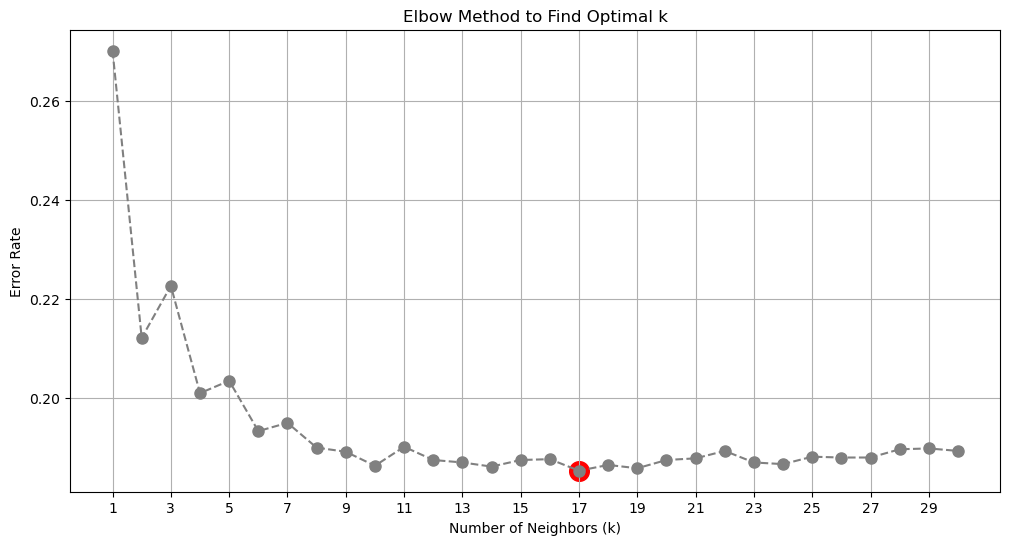

In [30]:
# plotting the elbow curve to find the optimal value of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='grey', markersize=8)

plt.scatter(k_values[knn_n], error_rates[knn_n], 
            color='red', s=200)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31, step=2))
plt.grid(True)
plt.show()

In [31]:
# calculating test accuracy when k=17
knn_17 = KNeighborsClassifier(n_neighbors=17)
knn_17.fit(X_train, y_train)
y_pred_17 = knn_17.predict(X_test)

# results
conf_matrix = confusion_matrix(y_test, y_pred_17)
class_report = classification_report(y_test, y_pred_17)
knn_accuracy = accuracy_score(y_test, y_pred_17)

# printing results 
print("Accuracy Score for KNN with 17 neighbors:", round(knn_accuracy, 2))

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy Score for KNN with 17 neighbors: 0.81

Confusion Matrix:
 [[4418  255]
 [ 857  470]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.35      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000



In [32]:
train_accuracy = knn_17.score(X_train, y_train)  # Accuracy on training data 
test_accuracy = knn_17.score(X_test, y_test)    # Accuracy on test data 

print(f"Training Accuracy based on the KNN Model: {train_accuracy:.4f}")
print(f"Test Accuracy based on the KNN Model: {test_accuracy:.4f}")

Training Accuracy based on the KNN Model: 0.8271
Test Accuracy based on the KNN Model: 0.8147


### Improving the Model 

#### + Perfoming SMOTE 

In [33]:
from imblearn.over_sampling import SMOTE

y.value_counts()

DEFAULT_PAYMENT
0    23364
1     6636
Name: count, dtype: int64

In [34]:
# applying SMOTE to balance the amount of unique values in Y
smote = SMOTE(sampling_strategy='minority')
X_smote, y = smote.fit_resample(X_scaled, y)

In [35]:
# checking smote result
y.value_counts()

DEFAULT_PAYMENT
1    23364
0    23364
Name: count, dtype: int64

In [36]:
# checking smote result
X_smote.shape

(46728, 23)

In [37]:
# checking smote result
y.shape

(46728,)

### Training the model KNN after Smote

In [38]:
X_smote

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_ST9,PAY_ST8,PAY_ST7,PAY_ST6,PAY_ST5,...,BILL_AMT7,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT9,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.789201,-0.792940,-0.778971,-0.764170,-0.837248,-0.664940,-0.765196,-0.749245,-0.750847,-0.719197
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.751866,-0.726949,-0.705596,-0.693637,-0.837248,-0.601273,-0.545696,-0.511257,-0.750847,-0.269927
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.548107,-0.503909,-0.461517,-0.427858,-0.519265,-0.498914,-0.545696,-0.511257,-0.512352,0.403980
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.121261,-0.221896,-0.163962,-0.125094,-0.418298,-0.392665,-0.501796,-0.487458,-0.495895,-0.494562
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.130810,-0.370617,-0.372363,-0.350383,-0.418298,3.084543,1.429807,1.392648,-0.586524,-0.566670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,-0.930032,-1.234323,0.185828,0.858557,-0.782427,2.684416,1.782348,1.809921,0.188746,0.234917,...,-0.537066,-0.511194,-0.470799,-0.716630,-0.496877,-0.805991,-0.667252,-0.579862,-0.226645,-0.456651
46724,-0.633751,-1.234323,0.019507,0.858557,-0.675067,1.794564,0.111736,0.138865,1.899436,0.234917,...,-0.508241,-0.477281,-0.431713,-0.397359,-0.335692,-0.334083,-0.650808,-0.521037,-0.511795,-0.318374
46725,-0.905498,-1.234323,1.451114,-1.057295,1.123955,0.932149,1.782348,1.809921,1.899436,-1.530046,...,0.138910,-0.792940,-0.778971,-0.764170,-0.332570,-0.805341,-0.765196,-0.749245,-0.750847,-0.719197
46726,-0.288907,0.810161,0.185828,-1.057295,-1.013813,-0.874991,-0.723570,-0.696663,-0.666599,-0.647565,...,-0.788241,-0.772484,-0.763250,-0.745941,-0.545205,-0.654450,-0.542563,-0.573076,-0.549844,-0.552913


In [39]:
# Standardization
X_smote_scaled = scaler.fit_transform(X_smote)

# Convert back to DataFrame
X_smote_scaled = pd.DataFrame(X_smote_scaled, columns=X_smote.columns)

In [40]:
# setting train and test data (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_smote_scaled, y, test_size=0.2, random_state=42, stratify=y)

# testing different values of k to perform KNN
error_rates = []
k_values = range(1, 30)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on test set
    error = 1 - accuracy_score(y_test, y_pred)  # Calculate error rate
    error_rates.append(error)

# finding the lowest value
k_min_value = min(error_rates)
knn_n = error_rates.index(k_min_value)
knn_n # index + 1 is the optimal KNN value which is the lowest 

0

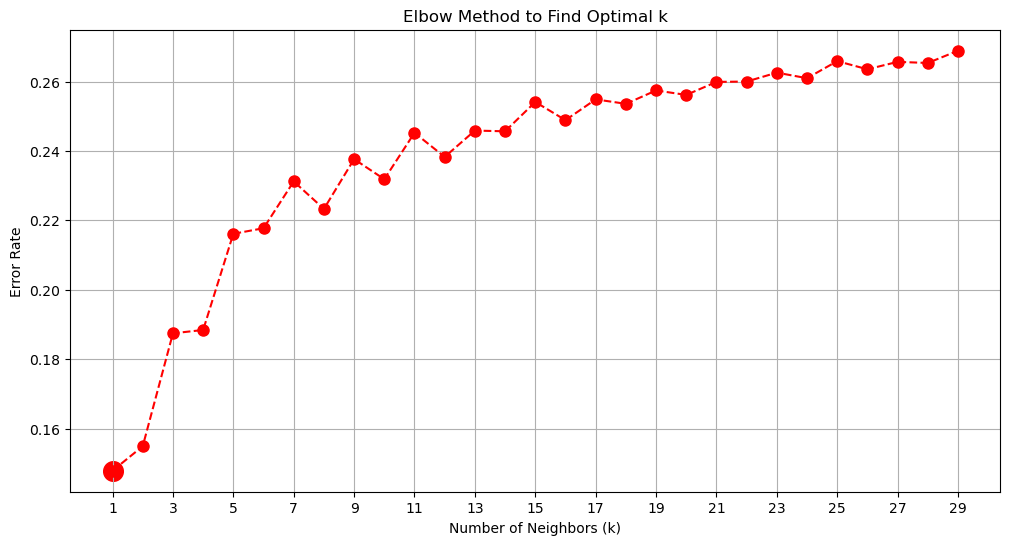

In [41]:
# plotting the elbow curve to find the optimal value of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='red', markersize=8)

plt.scatter(k_values[knn_n], error_rates[knn_n], 
            color='red', s=200)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31, step=2))
plt.grid(True)
plt.show()

In [42]:
# calculating test accuracy when k=17
knn_1 = KNeighborsClassifier(n_neighbors=17)
knn_1.fit(X_train, y_train)
y_pred_1 = knn_1.predict(X_test)

# results
conf_matrix = confusion_matrix(y_test, y_pred_1)
class_report = classification_report(y_test, y_pred_1)
knn_accuracy = accuracy_score(y_test, y_pred_1)

# printing results 
print("Accuracy Score for KNN with 1 neighbors:", round(knn_accuracy, 2))

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy Score for KNN with 1 neighbors: 0.75

Confusion Matrix:
 [[3089 1584]
 [ 798 3875]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72      4673
           1       0.71      0.83      0.76      4673

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.74      9346
weighted avg       0.75      0.75      0.74      9346

